In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [51]:
data1 = pd.read_csv('C:/Users/SRTINNI/Desktop/TPW/Datasets/covid-19 data set/Global_cvd/time_series_covid19_confirmed_global.csv')
data1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694


In [52]:
Region = data1["Country/Region"][0:50]
Day1 =  data1["3/17/20"][0:50]
Day2 =  data1["3/18/20"][0:50]
Day3 =  data1["3/19/20"][0:50]
Day4 =  data1["3/20/20"][0:50]

<function matplotlib.pyplot.legend(*args, **kwargs)>

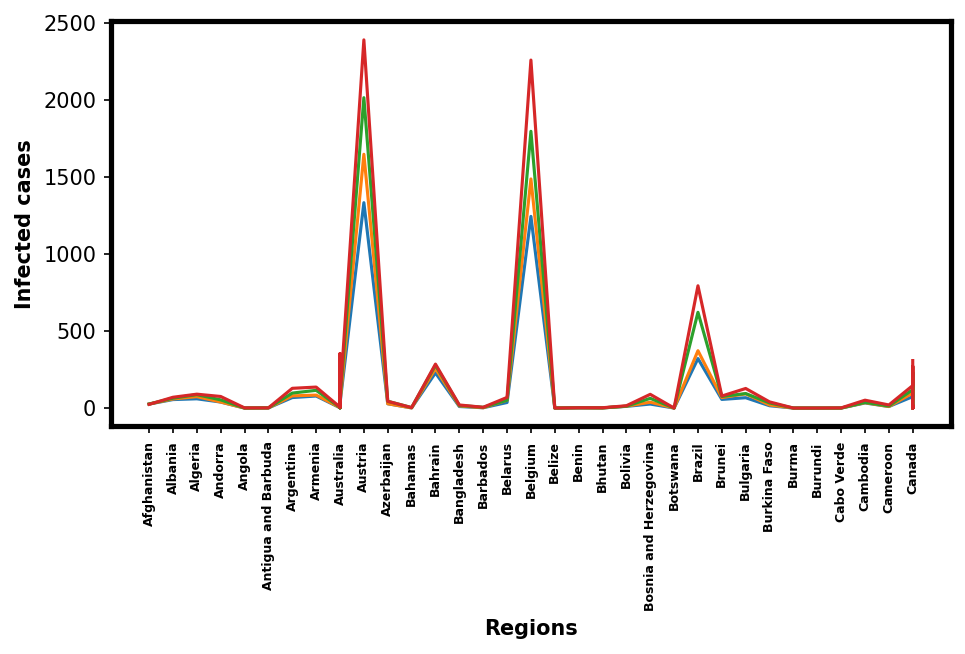

In [53]:
fig = plt.figure(figsize=(7,3),dpi=150)
ax = fig.add_axes([0.1,0.1,0.8,0.9])

for axis in ["top","right"]:
    ax.spines[axis].set_linewidth(2.5)
for axis in ["bottom","left"]:
    ax.spines[axis].set_linewidth(2.5)
    
plt.xticks(rotation = 90,fontsize = 6, fontweight = "bold")
plt.xlabel("Regions",fontweight="bold")
plt.ylabel("Infected cases",fontweight="bold")

plt.plot(Region, Day1)
plt.plot(Region, Day2)
plt.plot(Region, Day3)
plt.plot(Region, Day4)
plt.legend

In [54]:
confirmed_df = pd.read_csv('C:/Users/SRTINNI/Desktop/TPW/Datasets/covid-19 data set/Global_cvd/time_series_covid19_confirmed_global.csv')

print(confirmed_df.shape)

(280, 730)


In [55]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/7/22', '1/8/22', '1/9/22', '1/10/22', '1/11/22', '1/12/22',
       '1/13/22', '1/14/22', '1/15/22', '1/16/22'],
      dtype='object', length=730)

In [56]:
confirmed_df[confirmed_df["Country/Region"]=="Bangladesh"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22
20,NaN,Bangladesh,23.685,90.3563,0,0,0,0,0,0,...,1591093,1592209,1593700,1595931,1598389,1601305,1604664,1609042,1612489,1617711


In [57]:
confirmed_df = confirmed_df.replace(np.nan, '',regex=True)

In [58]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/7/22', '1/8/22', '1/9/22', '1/10/22', '1/11/22', '1/12/22',
       '1/13/22', '1/14/22', '1/15/22', '1/16/22'],
      dtype='object', length=730)

In [59]:
global_data = data1.copy().drop(['Lat','Long','Country/Region'],axis=1)

In [60]:
global_data.shape

(280, 727)

In [61]:
global_summery = pd.DataFrame(global_data.sum()).transpose()
global_summery.style.format("{:,.0f}")


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12

In [62]:
confirmed_ts = confirmed_df.copy().drop(['Province/State','Lat','Long','Country/Region'],axis=1)
confirmed_ts_summary= confirmed_ts.sum()


In [63]:
confirmed_ts_summary

1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1434
1/26/20         2118
             ...    
1/12/22    317279945
1/13/22    320099591
1/14/22    323570710
1/15/22    326153012
1/16/22    328072957
Length: 726, dtype: int64

In [64]:
fig = go.Figure(data=go.Scatter(x=confirmed_ts_summary.index,
                                y=confirmed_ts_summary.values,
                                mode='lines+markers'))
fig.update_layout(title='Total COVID_19 Confirmed Cases (Globally)',xaxis_title='Date',
                  yaxis_title = 'Confirmed Cases',
                  
                  xaxis_tickangle = 300)
fig.show()

In [65]:
death_df = pd.read_csv('C:/Users/SRTINNI/Desktop/TPW/Datasets/covid-19 data set/Global_cvd/time_series_covid19_deaths_global.csv')

print(death_df.shape)

(280, 730)


In [66]:
death_df = death_df.replace(np.nan, '',regex=True)

In [67]:
death_ts = death_df.copy().drop(['Province/State','Lat','Long','Country/Region'],axis=1)
death_ts_summary= death_ts.sum()

In [68]:
death_ts_summary

1/22/20         17
1/23/20         18
1/24/20         26
1/25/20         42
1/26/20         56
            ...   
1/12/22    5513619
1/13/22    5520810
1/14/22    5529539
1/15/22    5535426
1/16/22    5539569
Length: 726, dtype: int64

In [69]:
fig_2 = go.Figure(data = go.Scatter(x=death_ts_summary.index,y= death_ts_summary.values,mode='lines+markers'))
fig_2.update_layout(title="Total COVID-19 Death Cases(Globally)",xaxis_tickangle=300,xaxis_title='Date',yaxis_title='Death Cases')
fig_2.show()

In [70]:
recvr_df = pd.read_csv('C:/Users/SRTINNI/Desktop/TPW/Datasets/covid-19 data set/Global_cvd/time_series_covid19_recovered_global.csv')

print(recvr_df.shape)

(265, 730)


In [71]:
recvr_df = recvr_df.replace(np.nan, '',regex=True)

In [72]:
recvr_ts = recvr_df.copy().drop(['Province/State','Lat','Long','Country/Region'],axis=1)
recvr_ts_summary= recvr_ts.sum()

In [73]:
recvr_ts_summary

1/22/20    30
1/23/20    32
1/24/20    39
1/25/20    42
1/26/20    56
           ..
1/12/22     0
1/13/22     0
1/14/22     0
1/15/22     0
1/16/22     0
Length: 726, dtype: int64

In [74]:
fig_3 = go.Figure(data = go.Scatter(x=recvr_ts_summary.index,y= recvr_ts_summary.values,mode='lines+markers'))
fig_3.update_layout(title="Total COVID-19 Recovered Cases(Globally)",xaxis_tickangle=300,xaxis_title='Date',yaxis_title='Recovered Cases')
fig_3.show()

In [75]:
#initializing color array to be used across the analysis
color_arr = px.colors.qualitative.Dark24

In [76]:
def draw_plot(ts_array,
              ts_label,
              title,
              colors,
              mode_size,
              line_size,
              x_axis_title,
              y_axis_title,
              tickangle = 0,
              yaxis_type="",
              additional_annotations=""
             ):

    # Intialize figure
    fig = go.Figure()
#add all traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(
                                x = ts.index,
                                y = ts.values,
                                name = ts_label[index],
                                line = dict(color = colors[index], width = line_size[index]),
                                connectgaps=True
                                ))
    # base x_axis prop.
    x_axis_dict = dict(
                       showline = True,
                       showgrid = True,
                       showticklabels=True,
                       linecolor='rgb(204,204,204)',
                       linewidth=2,
                       ticks='outside',
                       tickfont = dict(family = 'Times new roman',size = 12,color='rgb(204,204,204)')
                      )
    # Setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
        
    if tickangle > 0:
        x_axis_dict['tickangle'] = tickangle
        
    # Base y_axis prop 
    y_axis_dict = dict(
                        showline = True,
                        showgrid = True,
                        showticklabels=True,
                        linecolor = 'rgb(204,204,204)',
                        linewidth=2
    )
   # Setting y_axis prop
    if yaxis_type != "":
        y_axis_dict['type'] = yaxis_type
    
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
        
    # Updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                      yaxis = y_axis_dict,
                      autosize=True,
                      margin = dict(autoexpand=True,l=100,r=20,t=110),
                      showlegend = True,
                      
                        )
   # Base annotations for any graph
    annotations = []
    # Title
    annotations.append(dict(xref='paper',yref='paper',x=0.0,y=1.05,xanchor='left',yanchor='bottom',
                            text=title,
                            font=dict(family='Times new roman',size=18,color='#072F39'),
                            showarrow=False,
                           ))
    # Adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
    # Updating the layout
    fig.update_layout(annotations=annotations)
    return fig

In [77]:
confirmed_agg_ts = confirmed_df.copy().drop(['Province/State','Long','Lat','Country/Region'],
                                            axis = 1).sum()
death_agg_ts = death_df.copy().drop(['Province/State','Long','Lat','Country/Region'],
                                             axis = 1).sum()
recovered_agg_ts = recvr_df.copy().drop(['Province/State','Long','Lat','Country/Region'],
                                             axis = 1).sum ()
# There is no timeseries data for Active cases, therefore it needs to be engineered separately
active_agg_ts = pd.Series(
                  data=np.array(
                        [x1 - x2 - x3 for (x1,x2,x3) in zip(confirmed_agg_ts.values,
                                                                death_agg_ts.values,
                                                                recovered_agg_ts.values)]),
                        index=confirmed_agg_ts.index)
#plot and add traces for all the aggregrated timeseries

In [78]:
#with death cases
ts_array=[confirmed_agg_ts,active_agg_ts,recovered_agg_ts, death_agg_ts]
labels = ['Confirmed','Active','Recovered','Deaths']
colors = [color_arr[5],color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]

#without death
#ts_array=[death_agg_ts,active_agg_ts]
#labels = ['Deaths','Active']
#colors = [color_arr[5],color_arr[0], color_arr[2]]
#mode_size = [4,10]
#line_size = [2,3,4]
# Calling the draw plot function defined above
fig_2 = draw_plot(
                ts_array=ts_array,
                ts_label=labels,
                title = "(COVID_19) case status from 22/1/2020 to 05/1/2022",
                colors=colors,
                mode_size=mode_size,
                line_size=line_size,
                x_axis_title = "Date",
                y_axis_title = "Case Count",
                tickangle = 315,
                yaxis_type = "",
                additional_annotations=[]
                )

fig_2.show()

#### Country/local analysis

In [79]:
country_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

In [80]:
cases_country_df = pd.read_csv(country_cases_file_link)
print(cases_country_df.shape)


(198, 16)


In [81]:
cases_country_df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2022-03-18 04:20:55,33.939110,67.709953,176918,7651,NaN,NaN,454.470947,NaN,NaN,4.324602,4,AFG,5224,138
1,Albania,2022-03-18 04:20:55,41.153300,20.168300,272885,3487,NaN,NaN,9482.417124,NaN,NaN,1.277828,8,ALB,3864,64
2,Algeria,2022-03-18 04:20:55,28.033900,1.659600,265511,6870,NaN,NaN,605.483888,NaN,NaN,2.587463,12,DZA,2502,107
3,Andorra,2022-03-18 04:20:55,42.506300,1.521800,39234,153,NaN,NaN,50778.489614,NaN,NaN,0.389968,20,AND,1342,2
4,Angola,2022-03-18 04:20:55,-11.202700,17.873900,99003,1900,NaN,NaN,301.229820,NaN,NaN,1.919134,24,AGO,417,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,West Bank and Gaza,2022-03-18 04:20:55,31.952200,35.233200,654380,5628,NaN,NaN,12827.418897,NaN,NaN,0.860051,275,PSE,31893,302
194,Winter Olympics 2022,2022-03-18 04:20:55,39.904200,116.407400,535,0,NaN,NaN,NaN,NaN,NaN,0.000000,2022,NaN,28,0
195,Yemen,2022-03-18 04:20:55,15.552727,48.516388,11797,2140,NaN,NaN,39.552782,NaN,NaN,18.140205,887,YEM,90,27
196,Zambia,2022-03-18 04:20:55,-13.133897,27.849332,315623,3962,NaN,NaN,1716.839401,NaN,NaN,1.255295,894,ZMB,5341,22


In [82]:
#Sort by Confirmed Cases
cases_country_df.copy().drop(
    ['Lat','Long_','Last_Update'],axis = 1).sort_values('Confirmed', ascending=False).reset_index(drop=True).style.bar(
    align="left",width=98,color="#000")

C:\Users\SRTINNI\anaconda3\lib\site-packages\pandas\io\formats\style.py:1165: RuntimeWarning:

All-NaN slice encountered

C:\Users\SRTINNI\anaconda3\lib\site-packages\pandas\io\formats\style.py:1166: RuntimeWarning:

All-NaN slice encountered



In [83]:
#Sort by Recovered Cases
cases_country_df.copy().drop(
    ['Lat','Long_','Last_Update','People_Tested','People_Hospitalized'],axis = 1).sort_values('Recovered', ascending=False).reset_index(drop=True).style.bar(
    align="left",width=98,color="#FF3333")

#### BD Cases COVID_19

In [84]:
# Confirmed Cases
confirmed_bd_ts = confirmed_df[confirmed_df['Country/Region'] == "Bangladesh"]
confirmed_bd_ts = confirmed_bd_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis = 1).reset_index(drop=True).sum()
# Deaths Casse
deaths_bd_ts = death_df[death_df['Country/Region'] == "Bangladesh"]
deaths_bd_ts = deaths_bd_ts.drop(['Lat','Long','Country/Region','Province/State'],
                                             axis = 1).reset_index(drop=True).sum()
# Recovered Cases
recovered_bd_ts = recvr_df[recvr_df['Country/Region'] == "Bangladesh"]
recovered_bd_ts = recovered_bd_ts.drop(['Lat','Long','Country/Region','Province/State'],
                                             axis = 1).reset_index(drop=True).sum()
# Active Cases
active_bd_ts = pd.Series(
                  data=np.array(
                        [x1 - x2 - x3 for (x1,x2,x3) in zip(confirmed_agg_ts.values,
                                                                death_agg_ts.values,
                                                                recovered_agg_ts.values)]),
                        index=confirmed_agg_ts.index)

In [85]:
ts_array=[confirmed_bd_ts,active_bd_ts,recovered_bd_ts, deaths_bd_ts]
labels = ['Confirmed','Active','Recovered','Deaths']
colors = [color_arr[5],color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]
# Calling the draw plot function defined above
fig_2 = draw_plot(
                ts_array=ts_array,
                ts_label=labels,
                title = "(COVID_19) In Bangladesh status from 22/1/2020 to 5/1/2022",
                colors=colors,
                mode_size=mode_size,
                line_size=line_size,
                x_axis_title = "Date",
                y_axis_title = "Case Count",
                tickangle = 315,
                yaxis_type = "",
                additional_annotations=[]
                )

fig_2.show()

In [86]:
ts_array=[confirmed_bd_ts[39:],active_bd_ts[39:],recovered_bd_ts[39:], deaths_bd_ts]
labels = ['Confirmed','Active','Recovered','Deaths']
colors = [color_arr[5],color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]
# Calling the draw plot function defined above
fig_2 = draw_plot(
                ts_array=ts_array,
                ts_label=labels,
                title = "(COVID_19) In Bangladesh status from 22/1/2020 to /1/2022",
                colors=colors,
                mode_size=mode_size,
                line_size=line_size,
                x_axis_title = "Date",
                y_axis_title = "Case Count",
                tickangle = 315,
                yaxis_type = "",
                additional_annotations=[]
                )

fig_2.show()

In [87]:
# Confirmed Cases
confirmed_Egypt_ts = confirmed_df[confirmed_df['Country/Region'] == "India"]
confirmed_Egypt_ts = confirmed_Egypt_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis = 1).reset_index(drop=True).sum()
# Deaths Casse
deaths_Egypt_ts = death_df[death_df['Country/Region'] == "Egypt"]
deaths_Egypt_ts = deaths_Egypt_ts.drop(['Lat','Long','Country/Region','Province/State'],
                                             axis = 1).reset_index(drop=True).sum()
# Recovered Cases
recovered_Egypt_ts = recvr_df[recvr_df['Country/Region'] == "Egypt"]
recovered_Egypt_ts = recovered_Egypt_ts.drop(['Lat','Long','Country/Region','Province/State'],
                                             axis = 1).reset_index(drop=True).sum()
# Active Cases
active_Egypt_ts = pd.Series(
                  data=np.array(
                        [x1 - x2 - x3 for (x1,x2,x3) in zip(confirmed_agg_ts.values,
                                                                death_agg_ts.values,
                                                                recovered_agg_ts.values)]),
                        index=confirmed_agg_ts.index)

In [88]:
ts_array=[confirmed_Egypt_ts,active_Egypt_ts,recovered_Egypt_ts, deaths_Egypt_ts]
labels = ['Confirmed','Active','Recovered','Deaths']
colors = [color_arr[5],color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]
# Calling the draw plot function defined above
fig_2 = draw_plot(
                ts_array=ts_array,
                ts_label=labels,
                title = "(COVID_19) In EGYPT status from 22/1/2020 to 21/4/2020 (مصر)",
                colors=colors,
                mode_size=mode_size,
                line_size=line_size,
                x_axis_title = "Date",
                y_axis_title = "Case Count",
                tickangle = 315,
                yaxis_type = "",
                additional_annotations=[]
                )

fig_2.show()